In [1]:
#导入数据
import pandas as pd
import pymysql
import numpy as np

def conn_sql():
    conn = pymysql.connect(
                        host='localhost',
                        port=3306,
                        user='root',
                        passwd='941207',
                        db='yeyw_db',
                        use_unicode=True,
                        charset='utf8',
                        )
    sql_cmd = "SELECT * FROM offer_discount_info_new"
    data = pd.read_sql(sql_cmd, conn)
    return data
    
data = conn_sql()

In [2]:
data = data[['offer_id', 'fee_amount', 'offer_acti_type', 'card_type', 'new_user', 'g3_phone', '4g_busi', '5g_busi', 'points', 
             'send_fee', 'school_discount', 'company_discount', 'up_grade', 'low_fee', 'terminal_type', 'bind_type', 'unpack_time', 
             'max_flow', 'call_time', 'is_count_flow', 'max_bind_num', 'stop_month_limit', 'no_stop_month', 'acti_type', 'fee_type', 
             'min_fee', 'acti_is_order', 'is_group_acti', 'month_safety_fee', 'acti_month_min_fee', 'spec_safety_fee', 
             'limit_base_meal', 'bind_imei', 'acti_cost', 'is_cust_cut_spec', 'acti_pre_num', 
             'is_acti_pre_money', 'sys_charge', 'is_spec_acti', 'group_fee', 'change_acti_month_limit', 'is_first_return', 
             'is_net_discount', 'net_discount', 'meal_down_judge', 'meal_down_group', 'terminal_acti_type', 'credit_buy_phone', 'red_paper_acti']]
data.set_index('offer_id', inplace=True)
#初步观察数据
# print(data.head(5))
print(data.shape)
# print(data.describe())

#是否有空值
# print(data.isnull().any())
# print(data.isna().sum())

(962, 48)


In [3]:
#相关性分析

correlation_matrix = np.corrcoef(data, rowvar=False) 
# print(correlation_matrix.round(2))
index = data.columns.values.tolist()
correlation_matrix = correlation_matrix.round(2)

correlation_matrix = pd.DataFrame(correlation_matrix, index=index)
correlation_matrix.columns = index
print(correlation_matrix)
correlation_matrix.to_csv("correlation_matrix.csv", header=True, encoding="gbk")
'''
rowvar : bool, optional
If rowvar is True (default), then each row represents a variable, with observations in the columns. 
Otherwise, the relationship is transposed: each column represents a variable, while the rows contain observations.
'''

                         fee_amount  offer_acti_type  card_type  new_user  \
fee_amount                     1.00            -0.02      -0.01     -0.01   
offer_acti_type               -0.02             1.00       0.04      0.01   
card_type                     -0.01             0.04       1.00     -0.01   
new_user                      -0.01             0.01      -0.01      1.00   
4g_busi                       -0.00            -0.00      -0.02      0.09   
5g_busi                       -0.01            -0.08      -0.01      0.00   
points                        -0.00            -0.01      -0.02     -0.02   
send_fee                      -0.02             0.20       0.01      0.05   
school_discount               -0.00             0.03      -0.06     -0.05   
company_discount              -0.00            -0.09      -0.04     -0.04   
up_grade                      -0.01            -0.06       0.09     -0.00   
low_fee                       -0.01             0.03      -0.06     -0.07   

'\nrowvar : bool, optional\nIf rowvar is True (default), then each row represents a variable, with observations in the columns. \nOtherwise, the relationship is transposed: each column represents a variable, while the rows contain observations.\n'

[Text(0,0,'fee_amount'),
 Text(0,0,'offer_acti_type'),
 Text(0,0,'card_type'),
 Text(0,0,'new_user'),
 Text(0,0,'4g_busi'),
 Text(0,0,'5g_busi'),
 Text(0,0,'points'),
 Text(0,0,'send_fee'),
 Text(0,0,'school_discount'),
 Text(0,0,'company_discount'),
 Text(0,0,'up_grade'),
 Text(0,0,'low_fee'),
 Text(0,0,'terminal_type'),
 Text(0,0,'bind_type'),
 Text(0,0,'unpack_time'),
 Text(0,0,'max_flow'),
 Text(0,0,'is_count_flow'),
 Text(0,0,'stop_month_limit'),
 Text(0,0,'no_stop_month'),
 Text(0,0,'acti_type'),
 Text(0,0,'fee_type'),
 Text(0,0,'min_fee'),
 Text(0,0,'acti_is_order'),
 Text(0,0,'is_group_acti'),
 Text(0,0,'month_safety_fee'),
 Text(0,0,'acti_month_min_fee'),
 Text(0,0,'spec_safety_fee'),
 Text(0,0,'limit_base_meal'),
 Text(0,0,'bind_imei'),
 Text(0,0,'is_cust_cut_spec'),
 Text(0,0,'acti_pre_num'),
 Text(0,0,'sys_charge'),
 Text(0,0,'is_spec_acti'),
 Text(0,0,'group_fee'),
 Text(0,0,'change_acti_month_limit'),
 Text(0,0,'is_first_return'),
 Text(0,0,'is_net_discount'),
 Text(0,0,'

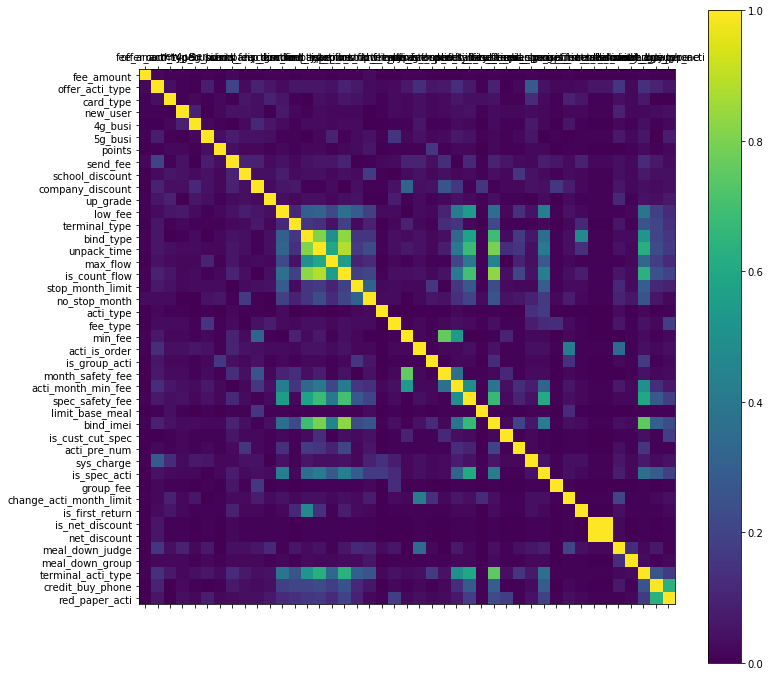

In [7]:
#绘制相关系数矩阵
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,12)) # 调用figure创建一个绘图对象 
ax = fig.add_subplot(111) # 设置1个子网格并添加子网格对象 
hot_img = ax.matshow(np.abs(correlation_matrix), vmin=0, vmax=1) 
 # 绘制热力图，值域从0到1 
fig.colorbar(hot_img) # 为热力图生成颜色渐变条 
ticks = np.arange(0, 48, 1) # 生成0～9，步长为1 
ax.set_xticks(ticks) # 生成x轴刻度 
ax.set_yticks(ticks) # 设置y轴刻度 
ax.set_xticklabels(data.columns.values.tolist()) # 生成x轴标签 
ax.set_yticklabels(data.columns.values.tolist()) # 生成y轴标签 

In [3]:
#删除相关性较高的is_count_flow，bind_imei，sys_charge，terminal_acti_type

data = data[['fee_amount', 'offer_acti_type', 'card_type', 'new_user', 'g3_phone', '4g_busi', '5g_busi', 'points', 
             'send_fee', 'school_discount', 'company_discount', 'up_grade', 'low_fee', 'terminal_type', 'bind_type', 'unpack_time', 
             'max_flow', 'call_time', 'max_bind_num', 'stop_month_limit', 'no_stop_month', 'acti_type', 'fee_type', 
             'min_fee', 'acti_is_order', 'is_group_acti', 'month_safety_fee', 'acti_month_min_fee', 'spec_safety_fee', 
             'limit_base_meal', 'acti_cost', 'is_cust_cut_spec', 'acti_pre_num', 
             'is_acti_pre_money', 'sys_charge', 'group_fee', 'change_acti_month_limit', 'is_first_return', 
             'net_discount', 'meal_down_judge', 'meal_down_group', 'credit_buy_phone', 'red_paper_acti']]


dataSt = data.stack()
dataSt = dataSt.unstack(0)


In [5]:
#皮尔森相似度的计算
from numpy import *

# dataX = np.mat(dataSt['111200000070'].values)
# dataY = np.mat(dataSt['600000229215'].values)

# cols = data.columns.size
# temp = data.columns.values.tolist()
# resMaxtrix = pd.DataFrame(columns = temp, index = temp)
    
# for A in temp:
#     for B in temp: 
#         dataA = np.mat(data[A].values)
#         dataB = np.mat(data[B].values)
# #         resMaxtrix.loc[A,B] = Pearson(dataA,dataB)
#         print(Pearson(dataA,dataB))
#         resMaxtrix[A][B] = Pearson(dataA,dataB)

# resMaxtrix.to_csv("resMaxtrix.csv", header=True, encoding="gbk")
        
# def Pearson(dataA,dataB):
#     avgA = np.mean(dataA)
#     avgB = np.mean(dataB)
#     sumData = (dataA - avgA) * (dataB - avgB).T # 若列为向量则为 dataA.T * dataB
#     denom = np.linalg.norm(dataA - avgA) * np.linalg.norm(dataB - avgB)
#     # 归一化
#     return (sumData / denom).tolist()[0][0]
    
    
# def Pearson3(dataA,dataB):
#     # 皮尔逊相关系数的取值范围(-1 ~ 1),0.5 + 0.5 * result 归一化(0 ~ 1)
#     return np.corrcoef(dataA,dataB,rowvar = 0)[0][1]



# print(Pearson(dataX, dataY))
# print(Pearson3(dataX, dataY))

#直接调用方法实现
data_corr = np.corrcoef(dataSt, rowvar = False)
column = dataSt.columns.values.tolist()
data_corr = pd.DataFrame(data_corr)
# print(data_corr.head(5))
data_corr.columns = column
data_corr.index = column

data_stack = pd.DataFrame(data_corr.stack())
data_stack.reset_index(inplace = True)
data_stack.columns = ['offer_id', 'offer_id_rec', 'simValue']

    
path = r'D:\krisl\Jupyter\协同过滤\simTable.txt'
f = open(path,'w',encoding='utf-8')
for index, row in data_stack.iterrows():
    s1 = str(row['offer_id'])
    s2 = str(row['offer_id_rec'])
    s3 = str(row['simValue'])
    f.write(s1+',')
    f.write(s2+',')
    f.write(s3+'\n')
f.close()


# data_corr.to_csv("data_corr.csv", header=True, encoding="gbk")

In [20]:
#皮尔森相似度结果，取相似度前十
dic = dict()
i = 0
for col in data_corr.columns:
#     print(data_corr[col])
    simList=data_corr[col].sort_values(ascending=False)
#     dic[col] = simList.index[0:10].tolist()
    if col != simList.index[0]:
        dic[col] = simList.index[0]
    else:
        dic[col] = simList.index[1]
#     i = i+1
#     if i == 50:
#         break



path = r'D:\krisl\Jupyter\协同过滤\simList.txt'
f = open(path,'w',encoding='utf-8')
for k,v in dic.items():
    s2 = str(v)
    f.write(k+',')
    f.write(s2+'\n')
f.close()

In [16]:
# 修正余弦相似度的计算

def AdjustedCosine(dataA,dataB):
    resA = np.mat((dataA - dataSt['avg']).values)
    resB = np.mat((dataB - dataSt['avg']).values)
    sumData = resA * resB.T # 若列为向量则为 dataA.T * dataB
    denom = np.linalg.norm(resA) * np.linalg.norm(resB)
    return (sumData / denom)[0,0]



#计算均值
dataSt['avg'] = dataSt.apply(lambda x: x.mean(), axis=1)
# print(dataSt.head(10))


cols = dataSt.columns.size
temp = dataSt.columns.values.tolist()
resMaxtrix = pd.DataFrame(columns = temp, index = temp)

for A in temp:
    for B in temp: 
#         print(AdjustedCosine(dataSt[A], dataSt[B]))
        resMaxtrix[A][B] = AdjustedCosine(dataSt[A], dataSt[B])

resMaxtrix.to_csv("resMaxtrix.csv", header=True, encoding="gbk")





D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
